# Introduction to Probability

## Motivation

We have seen that the concepts of statistical Thermodynamics, such as the Boltzmann factor and the partition function, require the use of probability.  These notes will introduce some fundamental concepts of discrete and continuous probability that we have/will use.

## Learning Goals:

After using these notes (/attending lecture), students should be able to:

1. Plot continuous and discrete probability densities of one variable.
2. Normalize continuous and discrete probability densities.
3. Compute average quantities from probability densities.

## Discrete Probability

Discrete probability or the probability of discrete events describes the likelihood of observing events such as flipping a coin or rolling a dice.  Consider flipping a coin.  We have intuition into this that, assuming the coin is "fair", we should have 
\begin{equation}
P_{Heads} = P_{Tails} = 0.5.
\end{equation}

More generally, for a discrete event $j$ (e.g. getting heads when flipping a coin), we have that
\begin{equation}
P_j = \lim_{N\rightarrow\infty} \frac{N_j}{N},
\end{equation}
where $N_j$ is the number of $j$ events and $N$ is the total number of events.

For example, if we flipped a coin nine times we might get:

In [1]:
import random  # library to generate random integer
def coinToss(number):
    recordList, heads, tails = [], 0, 0 # multiple assignment
    for i in range(number): # do this 'number' amount of times
        flip = random.randint(0, 1)
        if (flip == 0):
            recordList.append("H")
            heads += 1
        else:
            recordList.append("T")
            tails += 1
    print(str(recordList))
    print("Number of Heads:", heads)
    print("Number of Tails:", tails)
coinToss(9)

['H', 'H', 'T', 'T', 'T', 'T', 'H', 'T', 'H']
Number of Heads: 4
Number of Tails: 5


From this data we would say that:
\begin{eqnarray}
P_{Heads} &=& \frac{5}{9} \\
P_{Tails} &=& \frac{4}{9}.
\end{eqnarray}
In this case we don't quite get the expected $P_{Heads} = P_{Tails} = 0.5$ but that value is only guaranteed from a sample of infinite coin flips.

Some notes on general discrete probabilites.  We say that
\begin{equation}
P_j = 1
\end{equation}
indicates that event $j$ will happen with complete certainty.  Similarly,
\begin{equation}
P_j = 0
\end{equation}
implies that event $j$ is impossible.

Additionally, the following must be true
\begin{equation}
\sum_j N_j = N
\end{equation}
and
\begin{equation}
\sum_j P_j = 1.
\end{equation}
The first of these statements simply says that the sum over all events of the number of events of each type must be equal to the total number of events. The second states that the probabilities of events must sum to 1.  This is equivalent to the normalization condition.

### Computing Average Quantities from Discrete Probability Densities

If we consider discrete events for which a number if an outcome, we can compute the expected average value of this outcome.  Events like this could be rolling a dice or measuring quantized energy levels.  In this case, we can compute an average value of the discrete quantity, $x$, as
\begin{equation}
\langle x \rangle = \sum_{j=1}^n x_jP_j = \sum_{j=1}^n x_jP(x_j),
\end{equation}
where there are a total of $n$ possible outcomes and the $j$th outcome has probability $P_j$ or $P_j = P(x_j)$.  The last version of $P$, $P(x_j)$, introduces the idea that $P$ is a function of $x$ that returns the probabilty of observing that outcome.  $P(x)$ is referred to as a probability density.  

### Example of a Discrete Probability Density

Consider the following data:

| x      |     P(x)    |
|--------|-------------|
| -2     |  0.3        |
| -1     |  0.3        |
| 1      |  0.2        |
| 2      |  0.2        |

1. Is $P$ normalized? 
2. Plot P(x).
2. Compute $\langle x \rangle$.
3. Compute $\langle x^2 \rangle$.

1. Is $P$ normalized?  To address this, we compute 
\begin{eqnarray}
\sum_{j=1}^4 P(x_j) &=& 0.3 + 0.3 + 0.2 + 0.2 \\
&=& 1
\end{eqnarray}
Since $\sum P = 1$, the probability distribution is normalized.

In [2]:
import numpy as np
x = np.array([-2,-1,1,2])
p = np.array([0.3,0.3,0.2,0.2])

norm = np.sum(p)
print(norm)

1.0


2. Plot P(x).  See plot below.

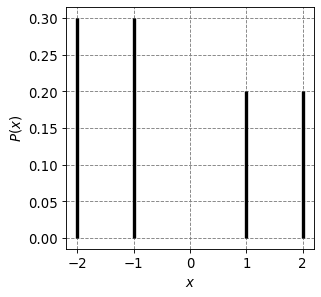

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=12
fig = plt.figure(figsize=(4,4), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$x$",size=fontsize)
ax.set_ylabel("$P(x)$",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
# plot distribution
plt.vlines(x,0,p,lw=3)

3. Compute $\langle x \rangle$:
    \begin{eqnarray}
    \langle x \rangle &=& \sum_{j=1}^4 x_jP(x_j) = (-2)\cdot 0.3 + (-1)\cdot 0.3 + (1)\cdot 0.2 + (2)\cdot 0.2 \\
    &=& -0.3
    \end{eqnarray}

In [4]:
print(np.round(np.sum(p*x),2))

-0.3


3. Compute $\langle x^2 \rangle$:
    \begin{eqnarray}
    \langle x \rangle &=& \sum_{j=1}^4 x_j^2P(x_j) = (-2)^2\cdot 0.3 + (-1)^2\cdot 0.3 + (1)^2\cdot 0.2 + (2)^2\cdot 0.2 \\
    &=& 2.5
    \end{eqnarray}

In [5]:
print(np.round(np.sum(x**2*p),2))

2.5


## Continuous Probability 

If $x$ is a continuous variable, e.g. positions or momenta, then the probability distribution $P(x)$ will be a continuous probability density.  In this case, the sums of discrete values is replaced with an integral over the continuous variable.  Take the normalization condition, for example.  For a continous probability density $P(x)$, we have
\begin{equation}
\int_{-\infty}^\infty P(x)dx = 1.
\end{equation}
Note that the limits of integration are from $-\infty$ to $\infty$ indicating that $x$ can take on values anywhere in this domain.  

We might be interested in the probability of observing a particular subdomain of $x$.  For example, if we are interested in the probability of observing $x$ in the domain $a \leq x \leq b$, we have that
\begin{equation}
P(a \leq x \leq b) = \int_{a}^{b}P(x)dx
\end{equation}

A note on units.  $P(x)dx$ is a unitless quantity.  This can be observed by looking at the normaliztion condition.  The integral $\int P(x)dx=1$ is a unitless quantity this $P(x)dx$ must be unitless.  $dx$ will have the same units as $x$ since it is the infinitesimal change in $x$. Thus, $P(x)$ will have units of inverse, or reciprocal, $x$.

## Computing Average Quantities from Continuous Probability Densities

The average value of $x$ for a continuous variable is given as
\begin{equation}
\langle x \rangle = \int_{-\infty}^{\infty} x P(x) dx
\end{equation}

Similarly, the average value of $x^2$, or the second moment of the distribution, is given as
\begin{equation}
\langle x^2 \rangle = \int_{-\infty}^{\infty} x^2 P(x) dx
\end{equation}

### Example: A Gaussian Distribution in 1D

A Gaussian distribution is one of the most widely used continuous probability distributions.  In 1D, it has the general form
\begin{equation}
P(x) = C e^{-\frac{(x-x_0)^2}{2\sigma^2}},
\end{equation}
where $x_0$ is the center/mean of the distribution, $C$ is the normalization factor, and $\sigma^2$ is the variance of the distribution ($\sigma = \sqrt{\sigma^2}$ is the standard deviation).  A 1D Gaussian distribution centered at $x_0=2$ and with a standard deviation of $\sigma = 1$ is plotted below.

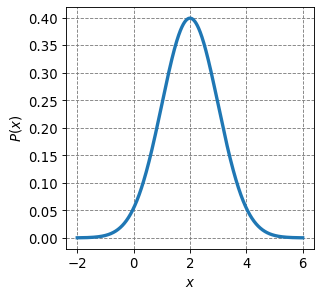

In [6]:
from scipy.stats import norm
# setup plot parameters
fontsize=12
fig = plt.figure(figsize=(4,4), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$x$",size=fontsize)
ax.set_ylabel("$P(x)$",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
# plot distribution
x = np.arange(-2,6,0.0001)
plt.plot(x,norm.pdf(x,loc=2,scale=1),lw=3)

1. We need to normalize this function.  To do so, we enfore the normalization condition
\begin{equation}
\int_{-\infty}^{\infty} P(x)dx = 1
\end{equation}

Plugging in the equation for a Gaussian we get
\begin{equation}
\int_{-\infty}^{\infty} C e^{-\frac{(x-x_0)^2}{2\sigma^2}}dx = 1
\end{equation}
or
\begin{equation}
C= \frac{1}{\int_{-\infty}^{\infty} e^{-\frac{(x-x_0)^2}{2\sigma^2}}dx}
\end{equation}

So how to we compute the integral $\int_{-\infty}^{\infty} e^{-\frac{(x-x_0)^2}{2\sigma^2}}dx$?  We will use integral tables (such as https://en.wikipedia.org/wiki/List_of_definite_integrals).  If you look for definite integrals involving exponential functions, you will find the following as the one that most closely resembles the Guassian integral
\begin{equation}
\int_0^\infty e^{-\alpha x^2} = \frac{\pi}{4\alpha}^{1/2}
\end{equation}
but note the difference in limits of integration and that the argument of the exponent does not exactly match the Guassian integral above.

Our goal now is to manipulate the Gaussian integral to look like the one from the table.  We start by performing some $u$-like substituions.  Start with $u = x-x_0$ which implies that $du = dx$:
\begin{eqnarray}
\int_{-\infty}^{\infty} e^{-\frac{(x-x_0)^2}{2\sigma^2}}dx &=& \int_{-\infty}^{\infty} e^{-\frac{u^2}{2\sigma^2}}du \\
&=& \int_{-\infty}^{\infty} e^{-\alpha u^2}du,
\end{eqnarray}
where in the second step we made the substitution that $\alpha = \frac{1}{2\sigma^2}$.  Note that we never changed the limits of integration.  The $u$ substitution should require this but since $\infty - x0 = \infty$ we didn't have to make any change.

### Even and Odd Functions

The last manipulation of the Guassian integral that we need to make is to change the limits of integration from $-\infty \rightarrow \infty$ to $0 \rightarrow \infty$.  We do this by employing the fact that the Guassian function is an even function.  Specifcally, $f(u) = e^{-\alpha u^2}$, is an even function of $u$.  But what is an even function, and by contrast what is an odd function?

An even function has the property that
\begin{equation}
f_{even}(-x) = f_{even}(x)
\end{equation}
An odd function has the property that
\begin{equation}
f_{odd}(-x) = -f_{odd}(x)
\end{equation}

Examples of even functions include even powers of $x$, e.g. $f(x) = x^2$.  Examples of odd functions include the odd powers of $x$, e.g. $f(x) = x^3$.  These two functions are plotted below.

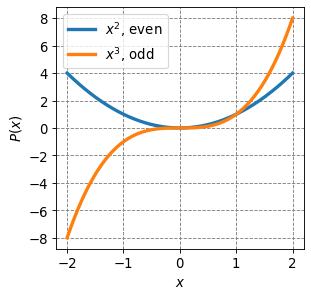

In [7]:
from scipy.stats import norm
# setup plot parameters
fontsize=12
fig = plt.figure(figsize=(4,4), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$x$",size=fontsize)
ax.set_ylabel("$P(x)$",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
# plot distribution
x = np.arange(-2,2,0.0001)
plt.plot(x,x**2,lw=3,label="$x^2$, even")
plt.plot(x,x**3,lw=3,label="$x^3$, odd")
plt.legend(fontsize=fontsize)

Even functions have the property that
\begin{equation}
\int_{\-infty}^\infty f_{even}(x)dx = 2\int_{0}^\infty f_{even}(x)dx.
\end{equation}
We will employ this property for the Gaussian function.

Odd functions have the property that 
\begin{equation}
\int_{\-infty}^\infty f_{odd}(x)dx = 0.
\end{equation}

Now back to the Guassian function, we had that
\begin{eqnarray}
\int_{-\infty}^{\infty} e^{-\frac{(x-x_0)^2}{2\sigma^2}}dx &=& \int_{-\infty}^{\infty} e^{-\frac{u^2}{2\sigma^2}}du \\
&=& \int_{-\infty}^{\infty} e^{-\alpha u^2}du,
\end{eqnarray}
where $\alpha = \frac{1}{2\sigma^2}$.  Using the fact that $e^{-\alpha u^2}$ is an even function of $u$ (demonstrate that to yourself) we have that
\begin{eqnarray}
\int_{-\infty}^{\infty} e^{-\frac{(x-x_0)^2}{2\sigma^2}}dx &=& \int_{-\infty}^{\infty} e^{-\frac{u^2}{2\sigma^2}}du \\
&=& \int_{-\infty}^{\infty} e^{-\alpha u^2}du \\
&=& 2 \int_{0}^{\infty} e^{-\alpha u^2}du \\
&=& 2 \left( \frac{\pi}{4\alpha}\right)^{1/2}
\end{eqnarray}

Plugging back in for $\alpha$ we get
\begin{eqnarray}
\int_{-\infty}^{\infty} e^{-\frac{(x-x_0)^2}{2\sigma^2}}dx &=&  2 \left( \frac{2\sigma^2\pi}{4}\right)^{1/2} \\
&=&  2 \left( \frac{\sigma^2\pi}{2}\right)^{1/2} \\
&=& \sqrt{2\sigma^2\pi}
\end{eqnarray}
or
\begin{equation}
C = \sqrt{\frac{1}{2\sigma^2\pi}} = \frac{1}{\sigma\sqrt{2\pi}}
\end{equation}

And finally our normalized Gaussian distribution:
\begin{equation}
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-x_0)^2}{2\sigma^2}}
\end{equation}